# Extract

In [1]:
PARAMS = {
    'session_names':['calibration','background'],
    'working_directory':'../19_1_27_MoseqMulti_with_compression/long_pairs',
    'delete_rosbag':False,
    'aligned_frame_windowsize':20,
}

In [ ]:
import shutil, json, os, sys, time, pickle, h5py, cv2, numpy as np, h5py
from MoseqMulti_extract import *

In [ ]:
def load_timestamps(path_prefix, metadata):
    timestamps = {}
    for sn in metadata['serial_numbers']:
        ts = np.load(path_prefix+'_'+sn+'_timestamps.npy')
        while np.argmax(ts) < len(ts)-1:
            ts[np.argmax(ts)+1:] = ts[np.argmax(ts)+1:] + (ts[np.argmax(ts)] - ts[np.argmax(ts)+1] + 1000./30)
        timestamps[sn] = ts
    return timestamps

def get_aligned_frames(timestamps, metadata, PARAMS):
    Ts = []
    for sn in metadata['serial_numbers']:
        T = timestamps[sn] - metadata['timestamps'][sn][10]
        Ts.append(T)

    aligned_frames = []
    timestamps = []
    for i,t in enumerate(Ts[0]):
        frame = [i]
        for T in Ts[1:]:
            frame.append(np.argmin(np.abs(T - t)))  
        times = [Ts[ii][frame[ii]] for ii in range(len( metadata['serial_numbers']))]
        if (np.max(times)-np.min(times)) < PARAMS['aligned_frame_windowsize']:
            aligned_frames.append(frame)
            timestamps.append(t)
    aligned_frames = np.array(aligned_frames)       
    print('Aligned',aligned_frames.shape[0],'out of',len(Ts[0]),'frames')
    return aligned_frames, timestamps

In [ ]:
def align_frames(PARAMS, n):
    path_prefix = PARAMS['working_directory']+'/data/'+n
    metadata = json.load(open(path_prefix+'_metadata.json'))
    timestamps = load_timestamps(path_prefix, metadata)
    aligned_frames, timestamps = get_aligned_frames(timestamps, metadata, PARAMS)
    alignment = h5py.File(path_prefix+'_alignment.h5','w')
    alignment.create_dataset('aligned_frames', data=aligned_frames)
    alignment.create_dataset('timestamps', data=timestamps)
    alignment.close()
    
    

### Get frames from each camera individually

In [ ]:
if len(PARAMS['session_names'])==0: session_names = get_extractable_sessions(PARAMS['working_directory'])
else: session_names = PARAMS['session_names']
print('Will extract the following sessions: ',session_names)

for n in session_names:
    print('\nExtracting',n)
    extract_to_avi(PARAMS,n)
    align_frames(PARAMS, n)
    if PARAMS['delete_rosbag']: delete_bagfiles(PARAMS['working_directory'],n)

Will extract the following sessions:  ['calibration', 'background']

Extracting calibration
Cam 816312061973 : 0 / 3009
Cam 739112061202 : 0 / 3009
Cam 739112060301 : 0 / 3009
Cam 816312062005 : 0 / 3009
Cam 816312062021 : 0 / 3009
Cam 816312062005 : 100 / 3009
Cam 739112061202 : 100 / 3009
Cam 739112060301 : 100 / 3009
Cam 816312062021 : 100 / 3009
Cam 816312061973 : 100 / 3009
Cam 739112061202 : 200 / 3009
Cam 739112060301 : 200 / 3009
Cam 816312062005 : 200 / 3009
Cam 816312061973 : 200 / 3009
Cam 816312062021 : 200 / 3009
Cam 816312062005 : 300 / 3009
Cam 739112061202 : 300 / 3009
Cam 739112060301 : 300 / 3009
Cam 816312061973 : 300 / 3009
Cam 816312062021 : 300 / 3009
Cam 816312062005 : 400 / 3009
Cam 739112061202 : 400 / 3009
Cam 739112060301 : 400 / 3009
Cam 816312062021 : 400 / 3009
Cam 816312061973 : 400 / 3009
Cam 739112060301 : 500 / 3009
Cam 816312062005 : 500 / 3009
Cam 739112061202 : 500 / 3009
Cam 816312062021 : 500 / 3009
Cam 816312062005 : 600 / 3009
Cam 739112060301 :

In [ ]:
n = 'test2'
path_prefix = PARAMS['working_directory']+'/data/'+n
metadata = json.load(open(path_prefix+'_metadata.json'))


In [7]:
al = h5py.File(path_prefix+'_alignment.h5','r')['aligned_frames'][:,:]


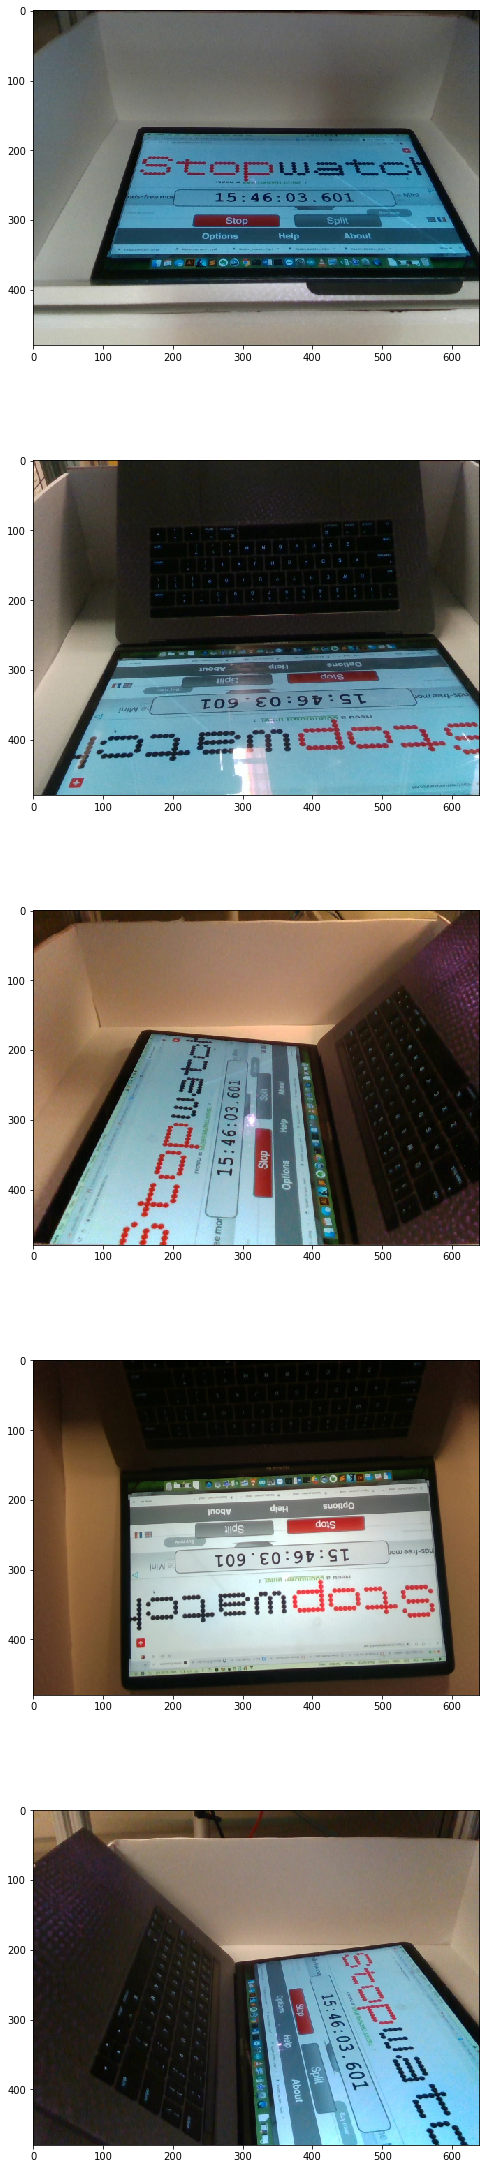

In [11]:
frame_index = 19900
fig,axs = plt.subplots(5,1)
for ii in range(5):
    sn = metadata['serial_numbers'][ii]
    pp = path_prefix+'_'+sn+'_color.mp4'
    current_frame = al[frame_index,ii]
    im = read_color_frames(pp,[current_frame])[0,:,:,:]
    axs[ii].imshow(im)
fig.set_size_inches((8,40))

In [18]:
amax = {}
for sn,ts in timestamps.items():
    amax[sn] = np.argmax(ts)
    print(metadata['serial_numbers'].index(sn), amax[sn])

3 16148
2 18055
4 13746
1 14520
0 29999


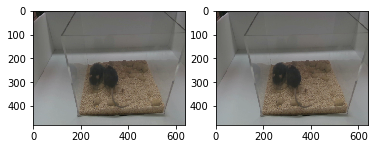

In [20]:
sn = metadata['serial_numbers'][1]
ii = amax[sn]
fig,axs = plt.subplots(1,2)
axs[0].imshow(read_color_frames(path_prefix+'_'+sn+'_color.mp4', [ii])[0,:,:,:])
axs[1].imshow(read_color_frames(path_prefix+'_'+sn+'_color.mp4', [ii-1])[0,:,:,:])

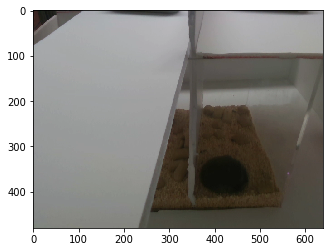

In [31]:
plt.imshow(dd[0,:,:,:])

### Align frames and make synced videos

In [4]:
cv2.VideoWriter_fourcc(*"LAGS")

1397178700

In [5]:
cv2.VideoWriter_fourcc(*"MJPG")

1196444237